In [3]:
pip install tensorflow torch torchvision ultralytics opencv-python numpy pandas matplotlib albumentations tf-slim onnx onnx-tf


^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
DATASET_PATH = "Mask Wearing.v4-raw.coco/"
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load EfficientDet Model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1"
detector = hub.load(model_url)

# Define Model
base_model = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
dense = tf.keras.layers.Dense(128, activation='relu')(global_avg_pool)
out_layer = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(dense)

model = tf.keras.Model(inputs=base_model.input, outputs=out_layer)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save Model
model.save("mask_detector_model.h5")

# Load & Test Model
def load_and_predict(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)
    img = np.expand_dims(img, axis=0) / 255.0
    pred = model.predict(img)
    return np.argmax(pred)

# Example Inference
sample_image = os.path.join(TEST_DIR, "Mask Wearing.v4-raw.coco\test\images\1579924271_jpg.rf.1fea0f43731fbea2876f63135256004f.jpg")
pred_class = load_and_predict(sample_image, model)
print(f"Predicted class: {pred_class}")



Found 84 images belonging to 1 classes.
Found 21 images belonging to 1 classes.



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


C:\Users\vikra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\vikra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\vikra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 591ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 604ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 674ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 686ms/step - accuracy: 1.0000 - loss

FileNotFoundError: [Errno 2] No such file or directory: 'Mask Wearing.v4-raw.coco/test\\sample.jpg'

In [38]:
# Load & Test Model
def load_and_predict(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)
    img = np.expand_dims(img, axis=0) / 255.0
    pred = model.predict(img)
    return np.argmax(pred)

# Example Inference
sample_image = "Mask Wearing.v4-raw.coco/test/images/download.jpeg"

pred_class = load_and_predict(sample_image, model)
print(f"Predicted class: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


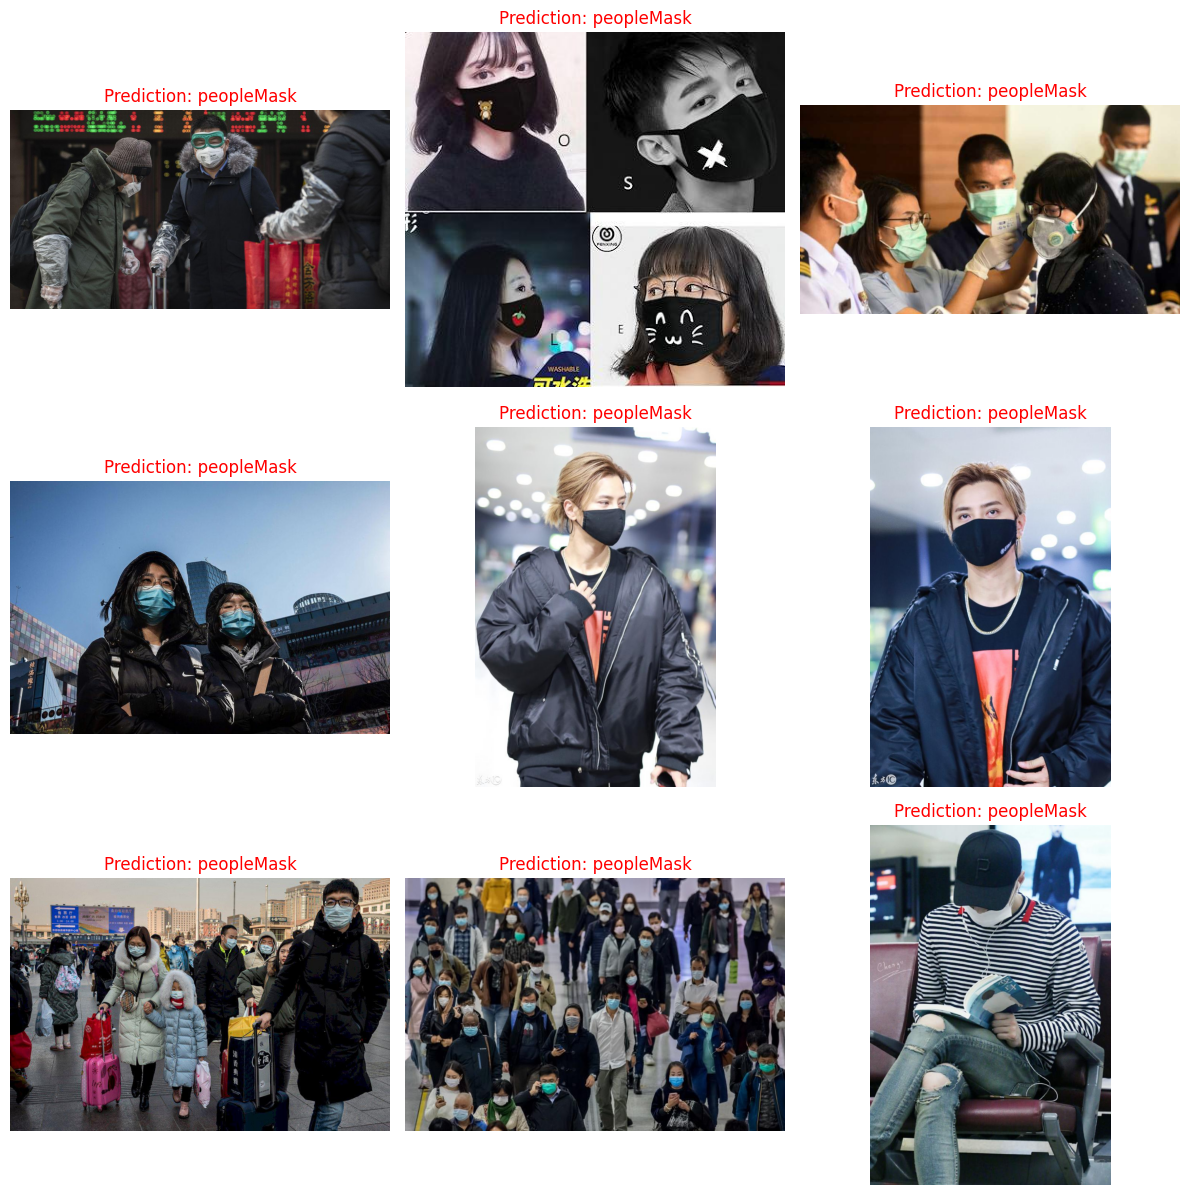

In [47]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load & Test Model
def load_and_predict(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
    img_resized = cv2.resize(img, IMG_SIZE)
    img_input = np.expand_dims(img_resized, axis=0) / 255.0
    pred = model.predict(img_input)
    return np.argmax(pred), img  # Return both prediction and the original image

# Get all test images
test_images_path =  "Mask Wearing.v4-raw.coco/test/images/"
test_images = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]

# Class labels (modify if necessary)
class_labels = {0: "peopleMask", 1: "with Mask", 2: "no Mask"}  # Update based on your dataset

# Run inference & visualize
plt.figure(figsize=(12, 12))

for i, image_path in enumerate(test_images[:9]):  # Show first 9 images
    pred_class, img = load_and_predict(image_path, model)
    label = class_labels.get(pred_class, "Unknown")

    # Display Image
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(img)
    plt.title(f"Prediction: {label}", fontsize=12, color="red")
    plt.axis("off")

plt.tight_layout()
plt.show()


Part--2


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Processing image: 01287.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


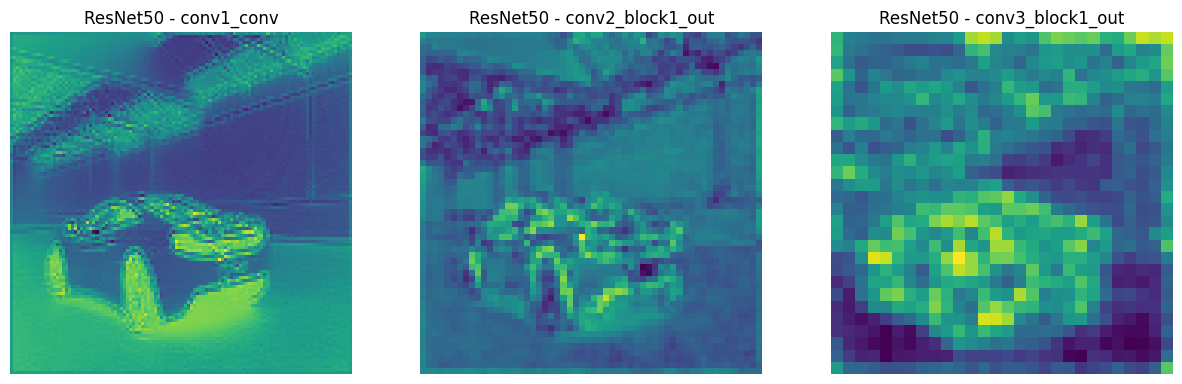

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


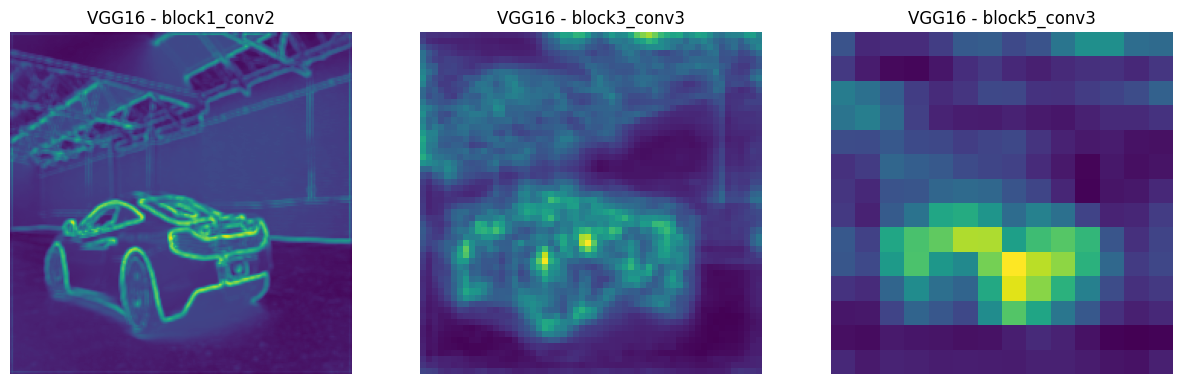

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


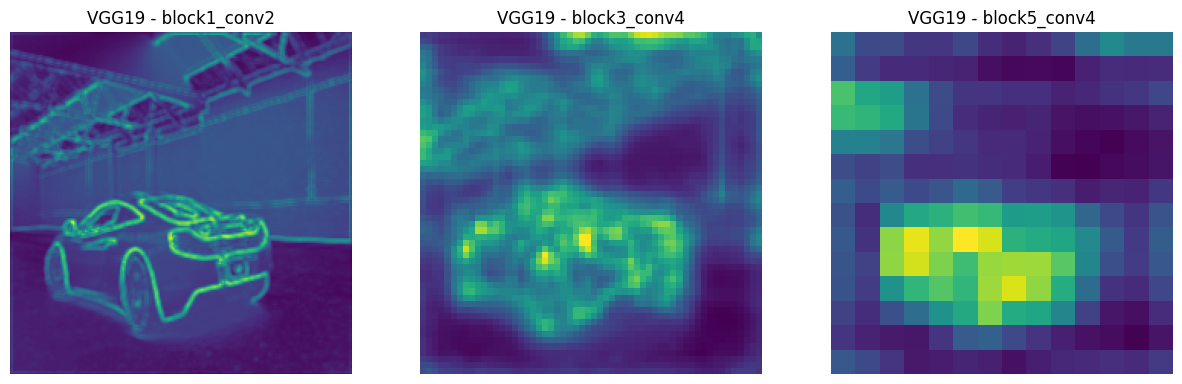

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


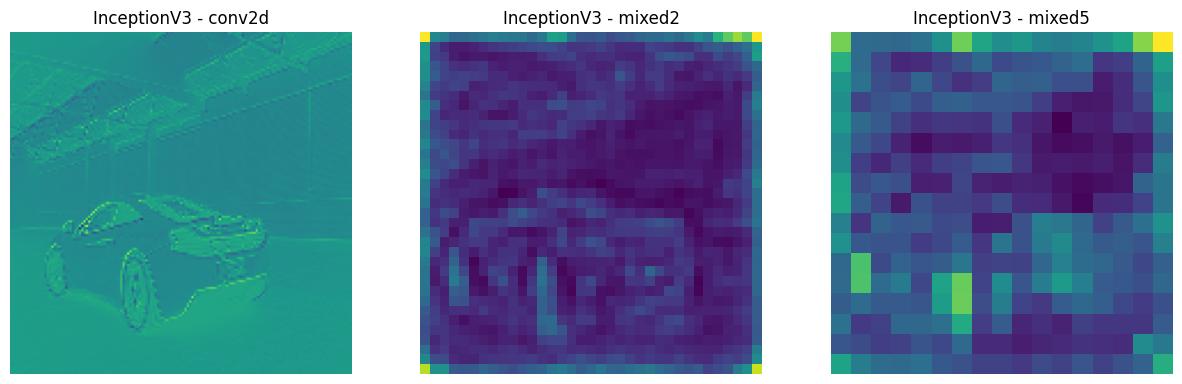

Processing image: 06172.jpg



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


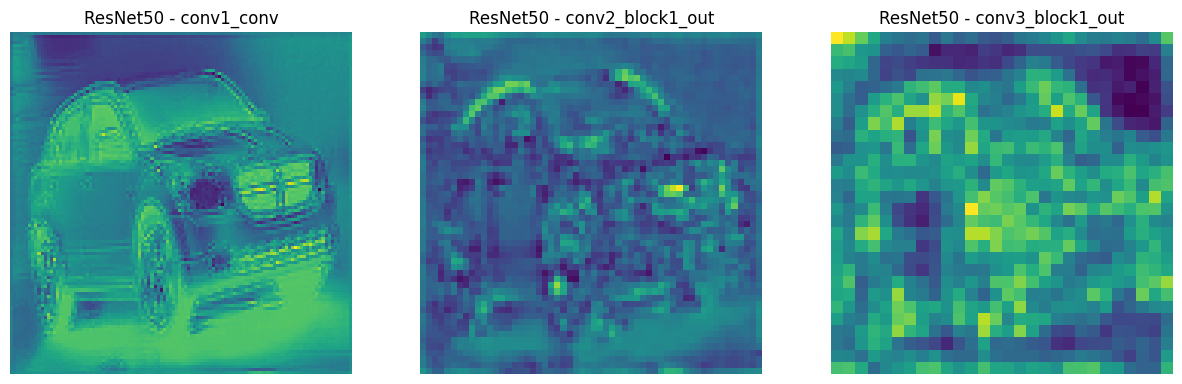

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


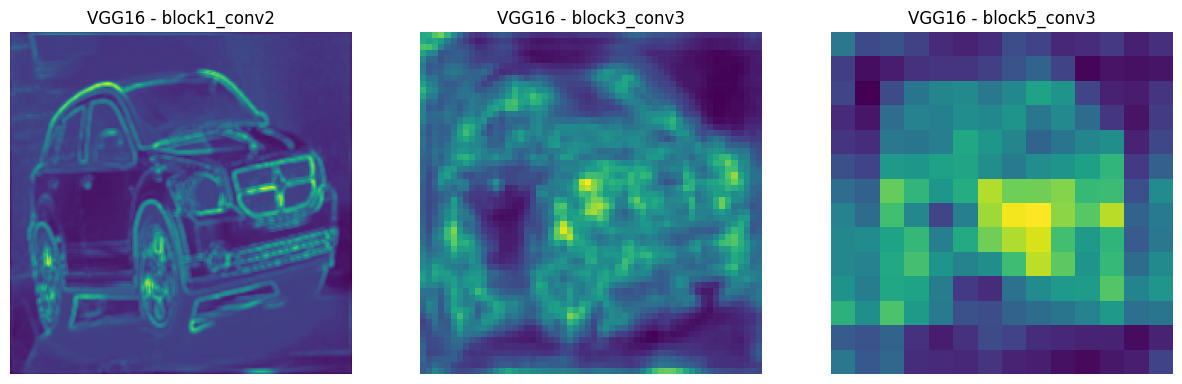

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


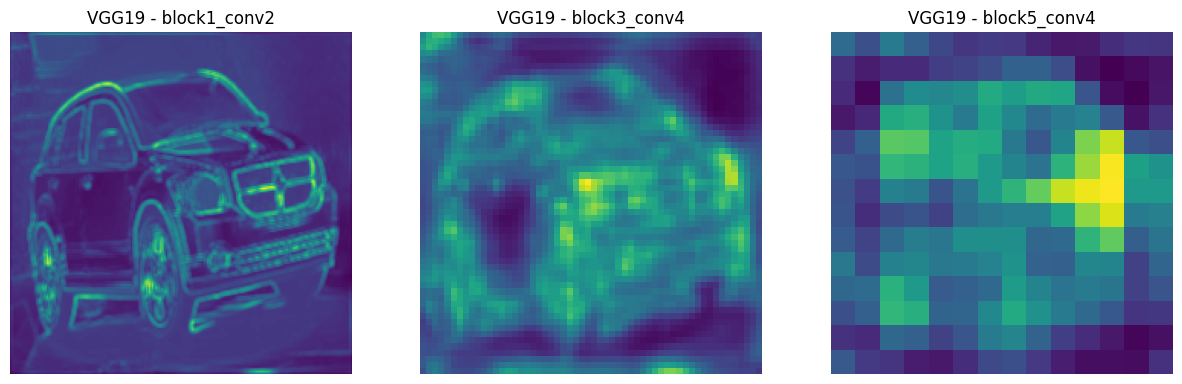

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


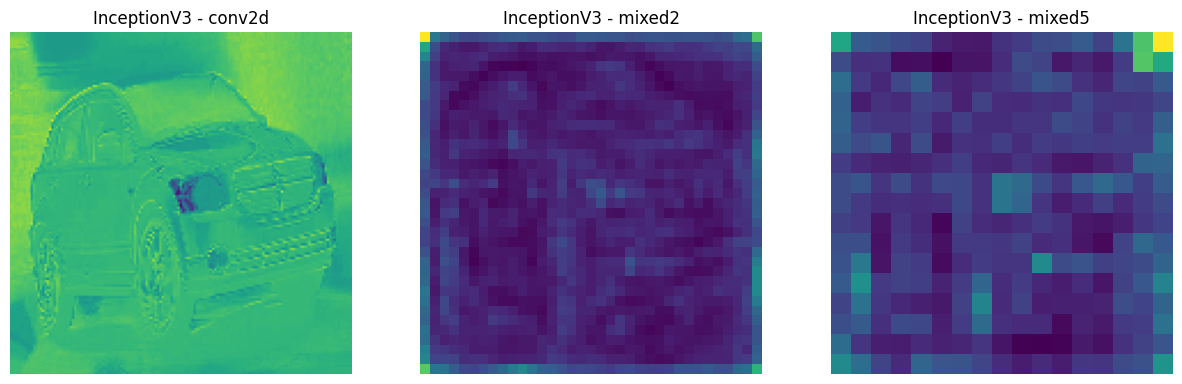

Processing image: 01783.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


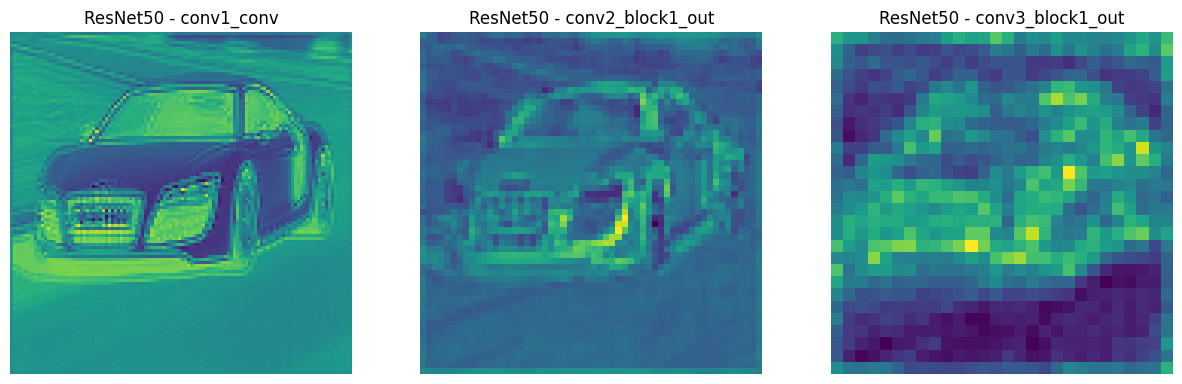

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


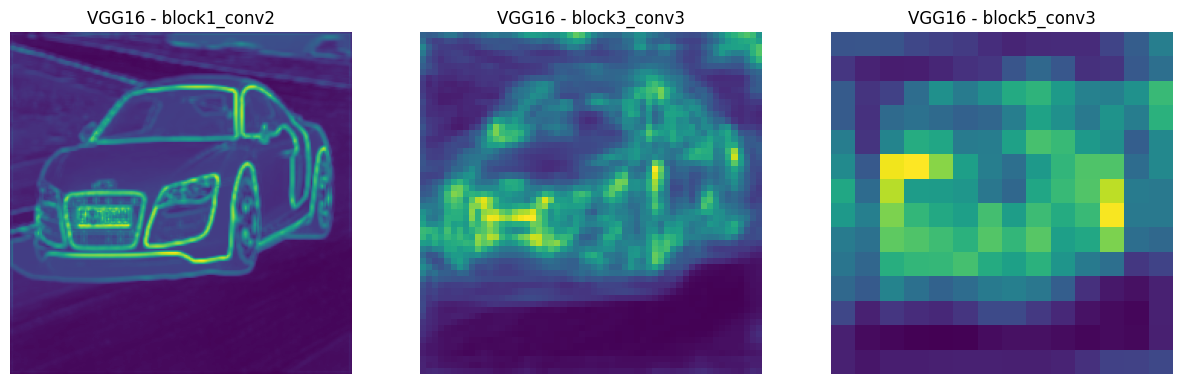

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


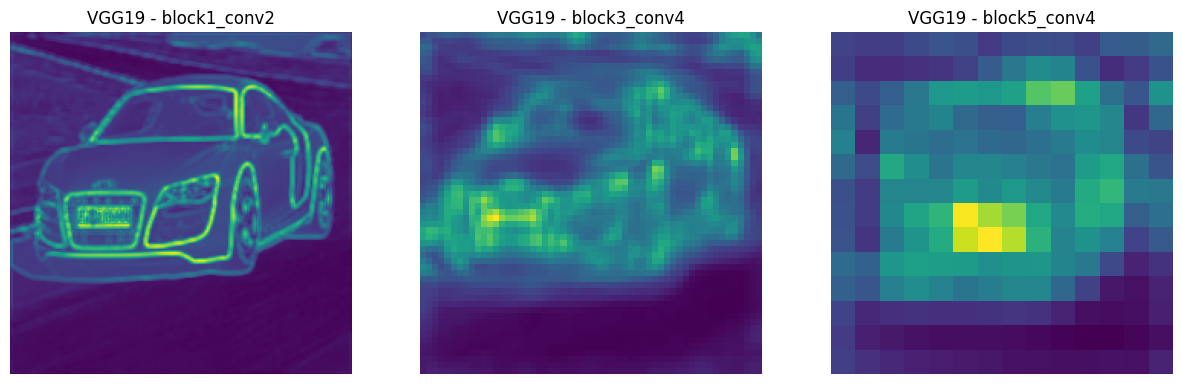

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


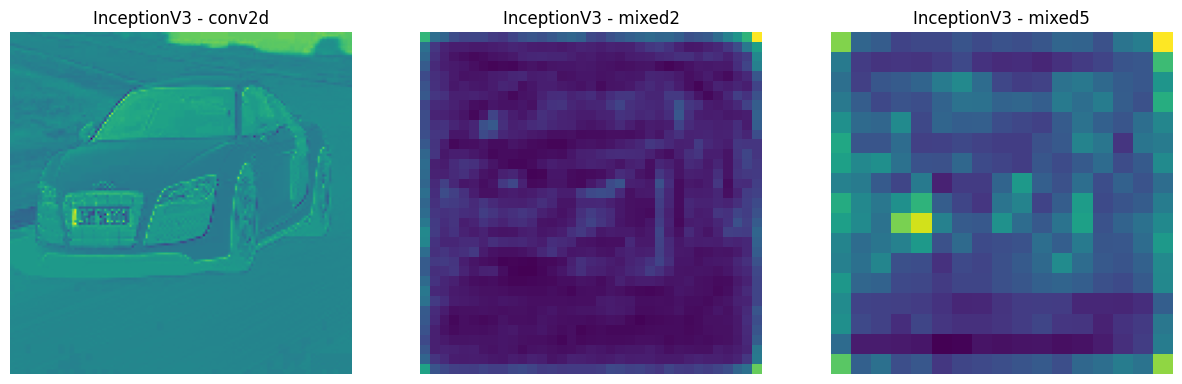

Processing image: 06055.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


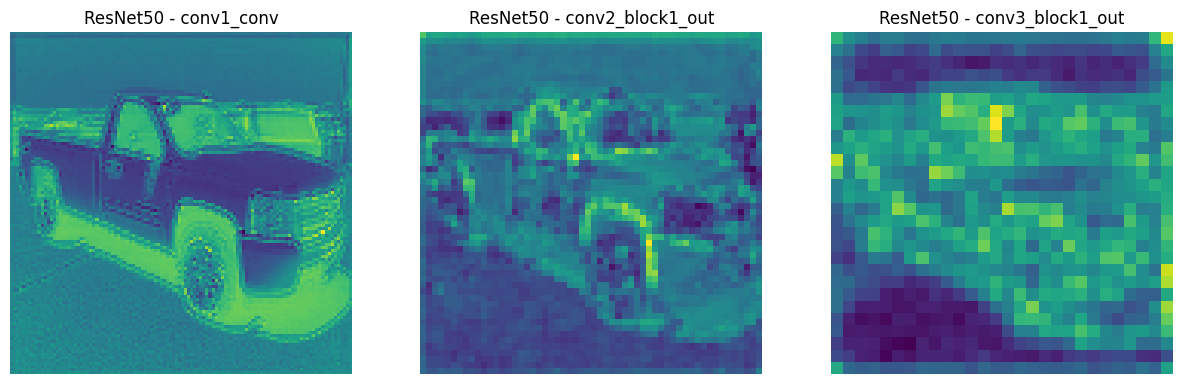

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


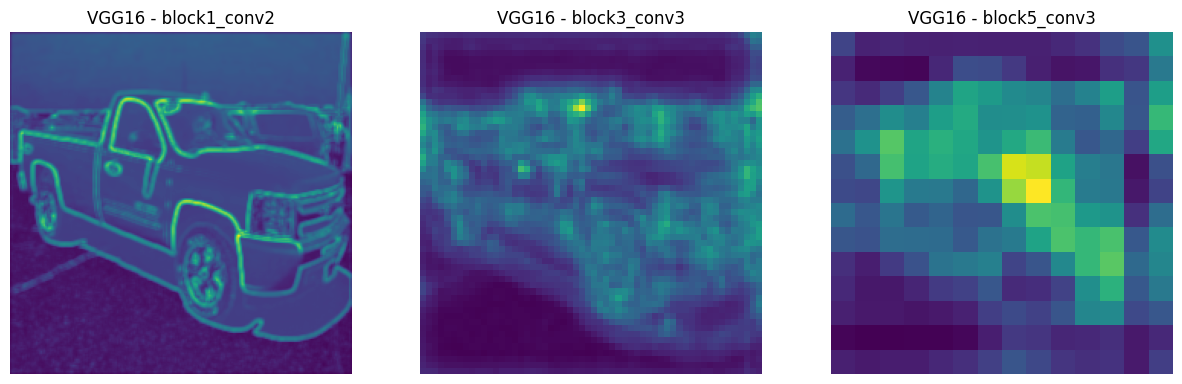

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


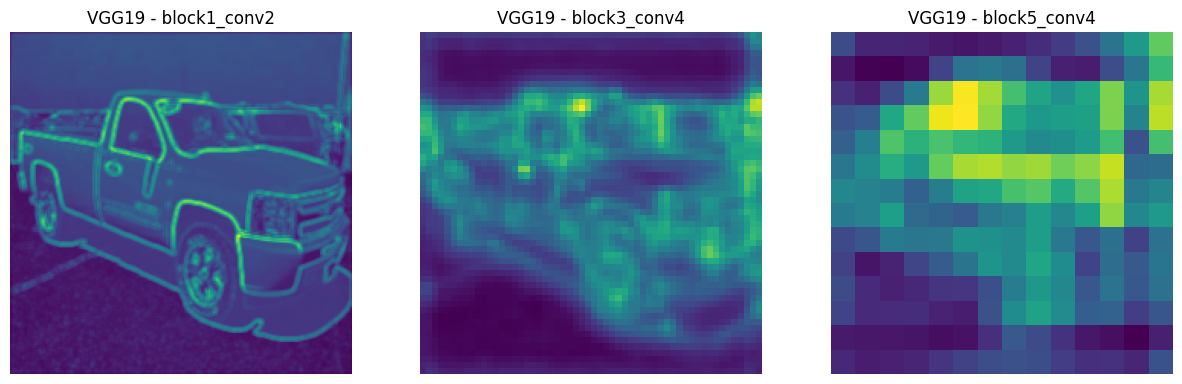

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


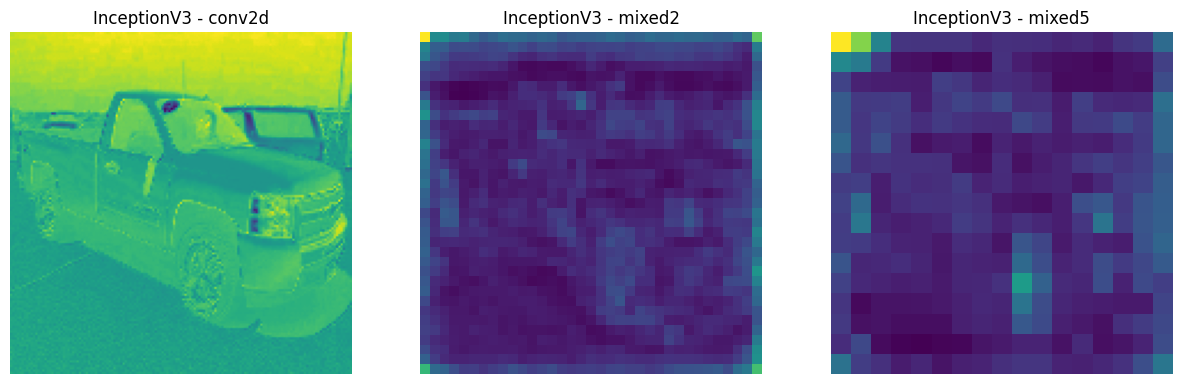

Processing image: 02370.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


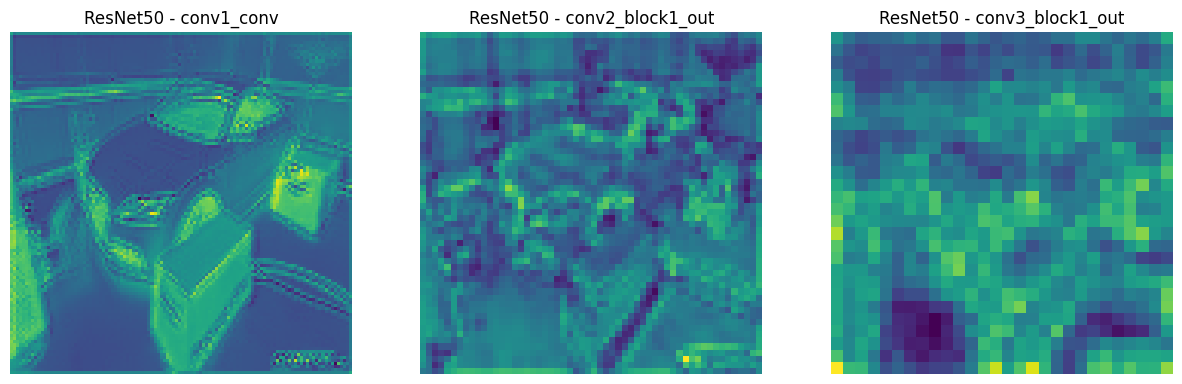

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


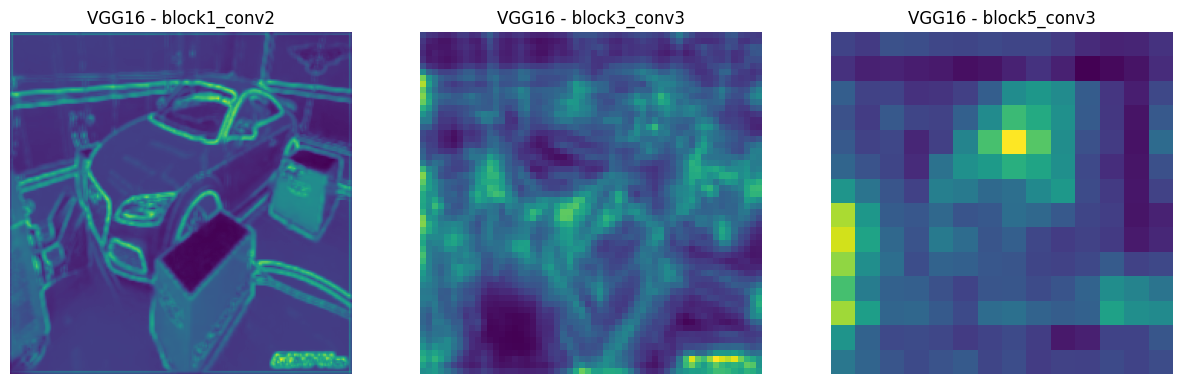

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


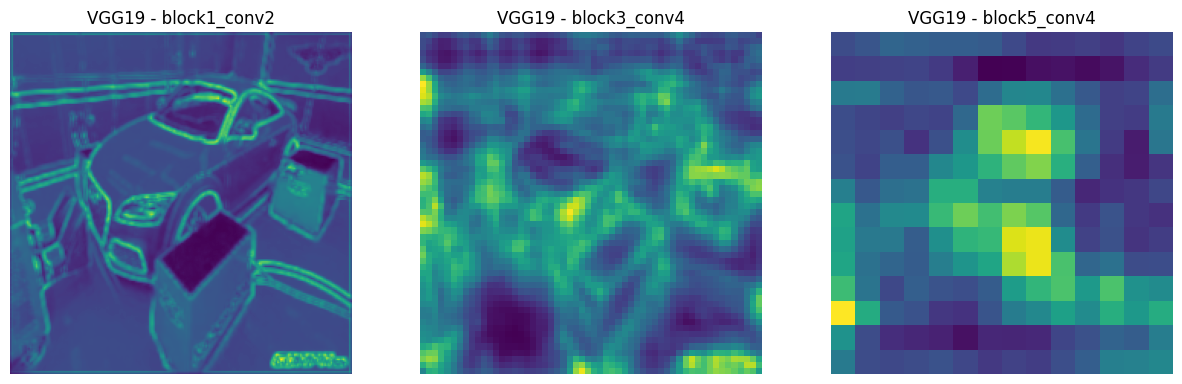

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


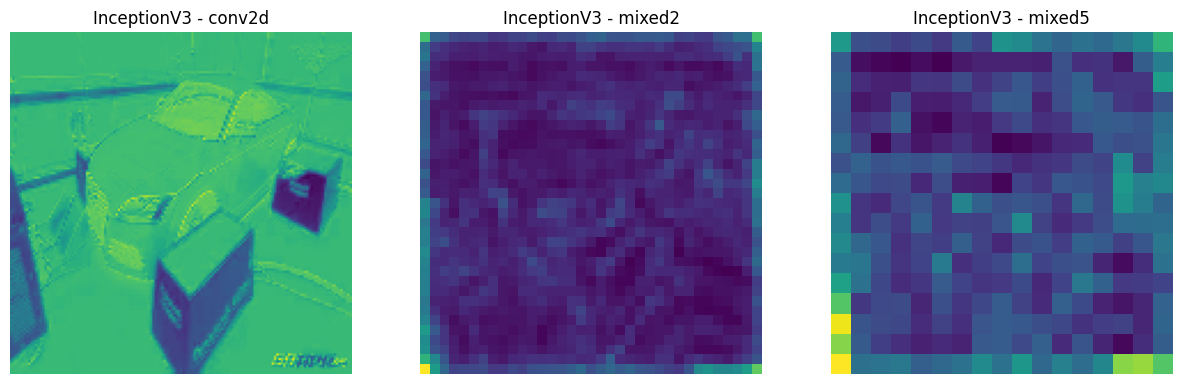

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

# Set dataset path (update this to your dataset location)
data_dir = "archive/cars_train/cars_train/"

# Randomly select 5 images
image_files = random.sample(os.listdir(data_dir), 5)

# Load models
models = {
    "ResNet50": (ResNet50(weights='imagenet', include_top=False), resnet_preprocess),
    "VGG16": (VGG16(weights='imagenet', include_top=False), vgg16_preprocess),
    "VGG19": (VGG19(weights='imagenet', include_top=False), vgg19_preprocess),
    "InceptionV3": (InceptionV3(weights='imagenet', include_top=False), inception_preprocess)
}

# Select three layers to extract features from each model
selected_layers = {
    "ResNet50": ["conv1_conv", "conv2_block1_out", "conv3_block1_out"],
    "VGG16": ["block1_conv2", "block3_conv3", "block5_conv3"],
    "VGG19": ["block1_conv2", "block3_conv4", "block5_conv4"],
    "InceptionV3": ["conv2d", "mixed2", "mixed5"]
}

def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def visualize_feature_maps(model_name, model, preprocess_func, layers, img_path):
    """Extract and visualize feature maps."""
    # Create feature extraction models
    outputs = [model.get_layer(layer).output for layer in layers]
    feature_extractor = Model(inputs=model.input, outputs=outputs)
    
    # Load and preprocess image
    target_size = (299, 299) if model_name == "InceptionV3" else (224, 224)
    img_array = load_and_preprocess_image(img_path, target_size)
    img_array = preprocess_func(img_array)
    
    # Get feature maps
    feature_maps = feature_extractor.predict(img_array)
    
    plt.figure(figsize=(15, 5))
    for i, fmap in enumerate(feature_maps):
        # Select first channel for visualization
        fmap = np.mean(fmap[0], axis=-1)
        plt.subplot(1, 3, i+1)
        plt.imshow(fmap, cmap='viridis')
        plt.axis('off')
        plt.title(f"{model_name} - {layers[i]}")
    plt.show()

# Process each image through all models
for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    print(f"Processing image: {img_file}\n")
    for model_name, (model, preprocess_func) in models.items():
        visualize_feature_maps(model_name, model, preprocess_func, selected_layers[model_name], img_path)
